In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from PIL import Image

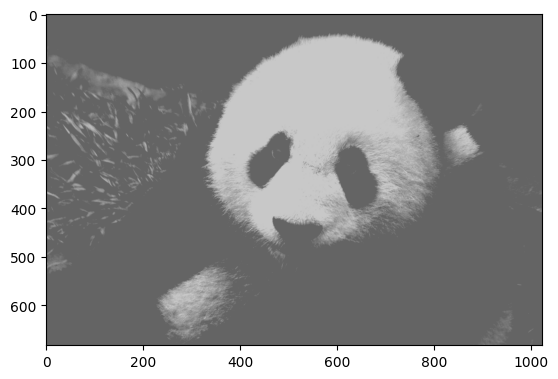

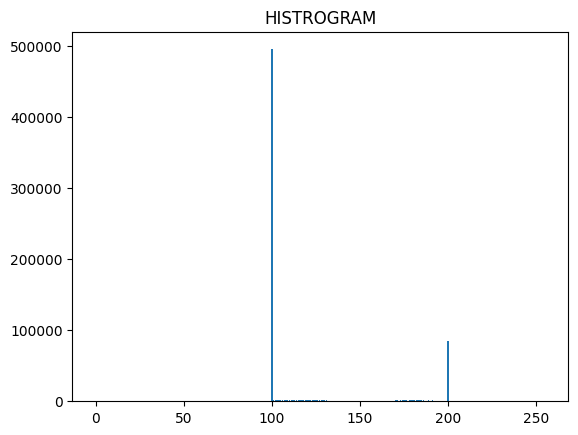

In [10]:
def Grayscale(img):
    h = img.shape[0]
    w = img.shape[1]
    img_out = img_out = np.full((h,w,3),0,dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = img[i][j][1]
    return img_out

def Clipping(img, min, max):
    h = img.shape[0]
    w = img.shape[1]
    img_out = img_out = np.full((h,w,3),0,dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if img[i][j][0] < min:
                img_out[i][j][0:3] = min
            elif img[i][j][0] > max:
                img_out[i][j][0:3] = max
            else:
                img_out[i][j][0:3] = img[i][j][0]
    return img_out

bgr = cv2.imread("image/panda.jpg") #ภาพBGR
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

rgb = Grayscale(rgb)
rgb = Clipping(rgb,100,200)

h = rgb.shape[0]
w = rgb.shape[1]
plt.imshow(rgb)
plt.show()
Y = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y[rgb[i][j][0]] +=1

plt.bar(range(256),Y)
plt.title("HISTROGRAM")
plt.show()




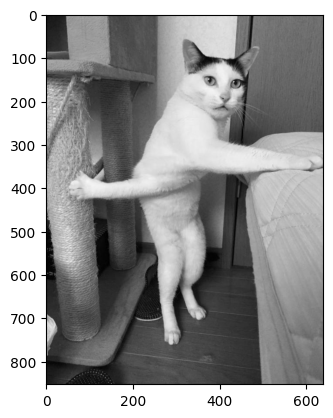

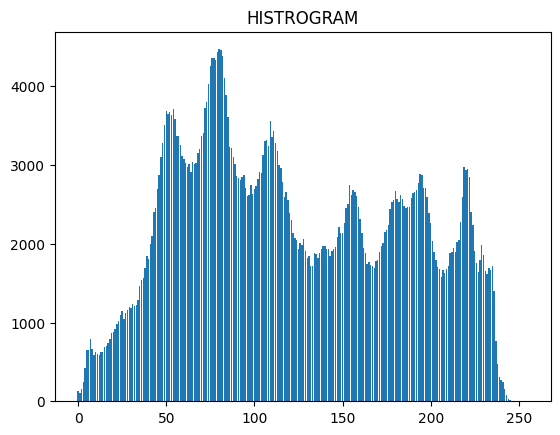

Local Maxima Indices: [7, 10, 25, 29, 31, 39, 50, 52, 54, 57, 63, 65, 77, 80, 94, 98, 103, 107, 109, 111, 118, 126, 128, 131, 134, 140, 142, 148, 154, 156, 165, 180, 183, 194, 197, 207, 213, 219, 221, 229, 233, 235, 250]
Local Maxima Values: [787, 624, 1143, 1202, 1235, 1844, 3690, 3670, 3716, 3369, 3018, 3038, 4359, 4469, 2867, 2751, 2908, 3319, 3564, 3430, 2651, 2004, 2061, 1844, 1888, 1971, 1935, 2207, 2743, 2687, 1772, 2665, 2623, 2883, 2714, 1668, 1944, 2974, 2950, 1978, 1692, 1723, 3]
Gk: [9, 27, 27, 30, 33, 51, 53, 56, 53, 56, 56, 62, 62, 64, 64, 78, 97, 102, 101, 101, 104, 104, 104, 108, 108, 110, 117, 117, 125, 127, 130, 133, 130, 133, 133, 136, 137, 137, 141, 146, 144, 150, 150, 155, 164, 182, 196, 208, 214, 214, 220, 228, 232, 234, 234]
Peakiness: [1.0648464163822526, 1.016, 1.016, 1.0134907251264755, 1.006519967400163, 1.0049288061336255, 1.0140148392415498, 1.0017841213202499, 1.0085188238527067, 1.0017841213202499, 1.0017841213202499, 1.0137722539469265, 1.013772253946926

In [51]:

bgr = cv2.imread("image/cat.jpg") #ภาพBGR
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

rgb = Grayscale(rgb)


h = rgb.shape[0]
w = rgb.shape[1]
plt.imshow(rgb)
plt.show()
Y = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y[rgb[i][j][0]] +=1

plt.bar(range(256),Y)
plt.title("HISTROGRAM")
plt.show()


local_maxima_index = []
local_maxima_value = []
for i in range(256):
    if Y[i-1] < Y[i] and Y[i] > Y[i+1] and i != 0 and i != 255:
        local_maxima_index.append(i)
        local_maxima_value.append(Y[i])

print("Local Maxima Indices:", local_maxima_index )
print("Local Maxima Values:", local_maxima_value)

distance = 10
gk = []
peakiness = []



for i in range(len(local_maxima_index)):
    for j in range(i+1,len(local_maxima_index)):
        if abs(local_maxima_index[i] - local_maxima_index[j]) < distance:
            # print("Local Maxima Indices:", local_maxima_index[i], local_maxima_index[j], "Local Maxima Values:", local_maxima_value[i], local_maxima_value[j])
            for k in range(local_maxima_index[i],local_maxima_index[j]):
                min_Value = local_maxima_value[i]
                if Y[k] < min_Value:
                    min_Value = Y[k]
                    min_index = k
            gk.append(min_index)
            cal_peakiness = min(Y[local_maxima_index[i]],Y[local_maxima_index[j]])/Y[min_index]
            peakiness.append(cal_peakiness)
            
            
print("Gk:",gk)
print("Peakiness:",peakiness)
max_peakiness = np.max(peakiness)
print("Max Peakiness:",max_peakiness)
threshold = peakiness.index(max_peakiness)
print("Threshold:",threshold)




